In [428]:
# Based on the past and current customer information,
# the company has maintained a database containing personal/demographic information,
# the services availed by a customer and the expense information related to each customer.


In [429]:
# The aim is to automate the process of predicting 
# if a customer would telecom or not and to find the factors affecting the telecom. 
# Whether a customer will telecom or not will depend on data from the following three buckets:

# 1. Demographic Information
# 2. Services Availed by the customer
# 3. Overall Expenses


In [430]:
# With 21 predictor variables we need to predict whether a particular customer will 
# switch to another telecom provider or not. In telecom terminology, 
# this is referred to as churning and not churning, respectively.


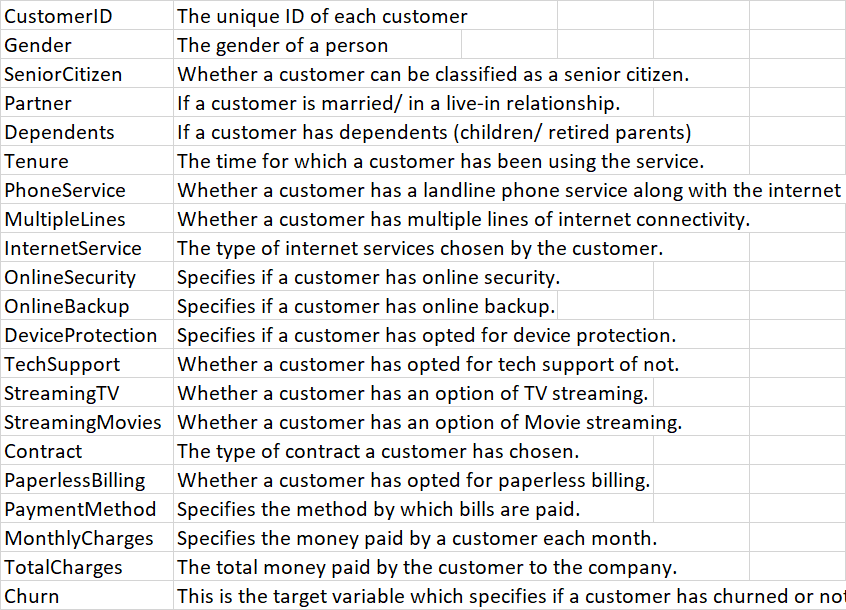

In [431]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [432]:
df1=pd.read_csv('D:\Pgm\DataScience\Dataset\class dataset\churn\churn_data.csv')

In [433]:
df1

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [434]:
df2=pd.read_csv('D:\Pgm\DataScience\Dataset\class dataset\churn\customer_data.csv')

In [435]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [436]:
df3=pd.read_csv('D:\Pgm\DataScience\Dataset\class dataset\churn\internet_data.csv')

In [437]:
df3

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [438]:
new_df=pd.merge(df1,df2,on='customerID',how='outer')
new_df.shape

(7043, 13)

In [439]:
final_df=pd.merge(new_df,df3,on='customerID',how='inner')

In [440]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [441]:
final_df.shape

(7043, 21)

In [442]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [443]:
final_df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [444]:
final_df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [445]:
# so no missing values in our dataset

In [446]:
# now analysing each columns one by one

In [447]:
final_df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [448]:
# tenure is timing customer using for service

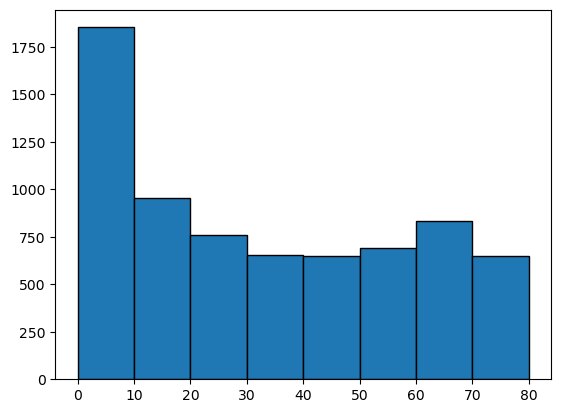

In [449]:
plt.hist(final_df['tenure'],edgecolor='black',bins=[0,10,20,30,40,50,60,70,80])
plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

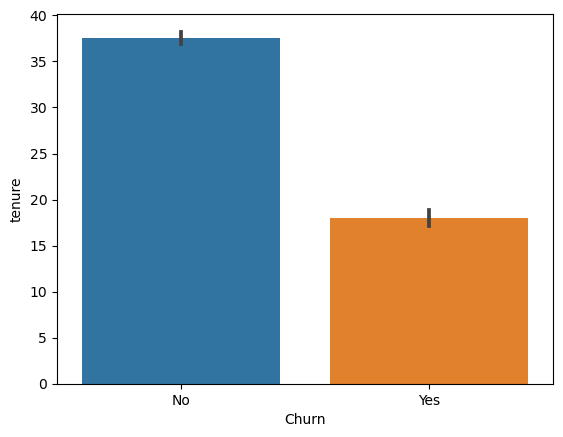

In [450]:
sns.barplot(data=final_df,x='Churn',y='tenure')

In [451]:
# so most of customers having tenure between 0 to 10 years

In [452]:
final_df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [453]:
# it a categorical data

In [454]:
phone_service_group=final_df.groupby(final_df['PhoneService']).size().reset_index().rename(columns={0:'size'})
phone_service_group

,PhoneService,size
0,No,682
1,Yes,6361


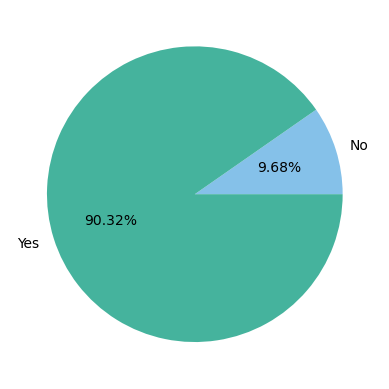

In [455]:
plt.pie(final_df.groupby(final_df['PhoneService']).size(),autopct='%.2f%%',labels=phone_service_group['PhoneService'],
        colors=['#85c1e9','#45b39d'])
plt.show()

In [456]:
# so 90 % of customer availing phone service

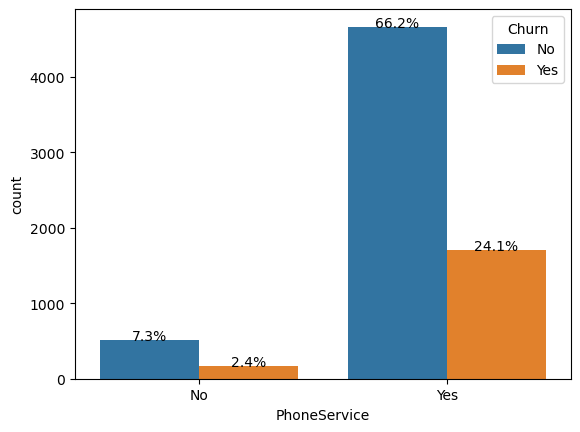

In [457]:
ax=sns.countplot(data=final_df, x='PhoneService',hue='Churn')
total = float(len(final_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()+ p.get_width()-0.2
    y = p.get_height()
    ax.annotate(percentage, (x,y),ha='center',)
plt.show()

In [458]:
# out of that 90% of customers availing phone service 24% choosed to churn while is rest of 10% its almost 50-50% 

In [459]:
final_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [460]:
# so it a categorial type of data

In [461]:
# majority of customers are doing contract from month to month

In [462]:
final_df.groupby('Contract').size().reset_index().rename(columns={0:'size'})

,Contract,size
0,Month-to-month,3875
1,One year,1473
2,Two year,1695


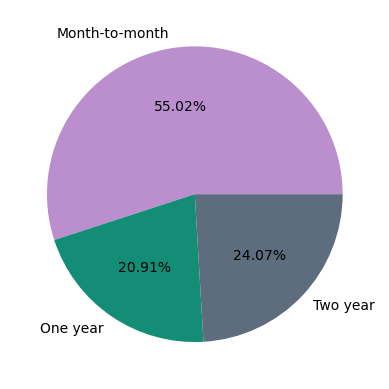

In [463]:
plt.pie(final_df.groupby('Contract').size(),
       autopct="%.2f%%",
       labels=final_df.groupby('Contract').size().reset_index().rename(columns={0:'size'})['Contract'],
       colors=['#bb8fce', '#138d75','#5d6d7e'])

plt.show()

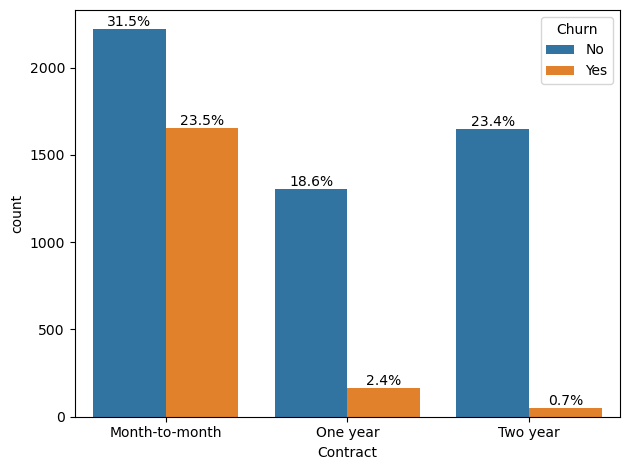

In [464]:

ax=sns.countplot(data=final_df,x='Contract',hue='Churn')
total = float(len(final_df))
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/final_df.Contract.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')
plt.tight_layout()

In [465]:
# so from obersevation churning is most common in customer who have contract on month to month followed by one year 
# and very least almost negligible for cusomers with 2years of contract
# so definately contract has influence on churning

In [466]:
final_df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [467]:
final_df.groupby('PaperlessBilling').size()

PaperlessBilling
No     2872
Yes    4171
dtype: int64

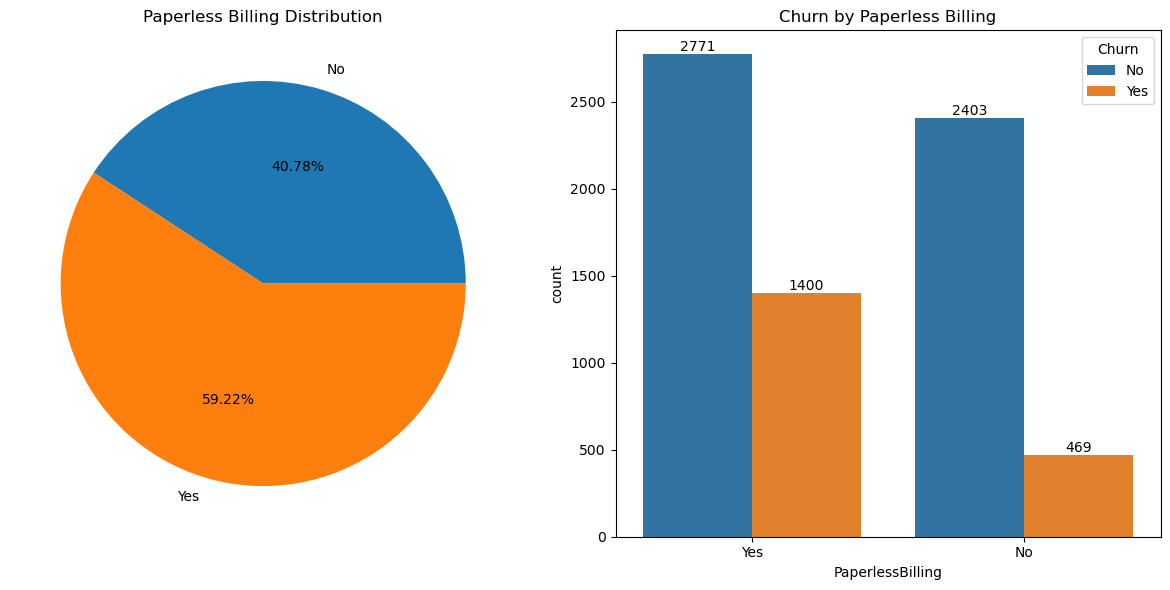

In [468]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

axs[0].pie(final_df.groupby('PaperlessBilling').size(), labels=['No', 'Yes'], autopct='%.2f%%')
axs[0].set_title('Paperless Billing Distribution')

ax2 = sns.countplot(data=final_df, x='PaperlessBilling', hue='Churn', ax=axs[1])
for container in ax2.containers:
    ax2.bar_label(container)
axs[1].set_title('Churn by Paperless Billing')

plt.tight_layout()

plt.show()

In [469]:
# majority of customers availing paperless billing
# so from observation those customer having paperless billing are more prone to churing than who opted for no to
# paperless billing

In [470]:
final_df.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: PaperlessBilling, dtype: int64

In [471]:
# percentage customers choosed no to paperless billing are churned

In [472]:
final_df.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()[1]/final_df.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()[0:2].sum()*100

16.33008356545961

In [473]:
# percentage customers choosed yes to paperless billing are churned

In [474]:
final_df.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()[3]/final_df.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()[2:].sum()*100

33.565092304003834

In [475]:
# only 16% customer out of customers choosed no to paperless billing are churned
# while 34 % of customers out of customers choosed  yes for paperless billing are churned
# which is just double

In [476]:
final_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

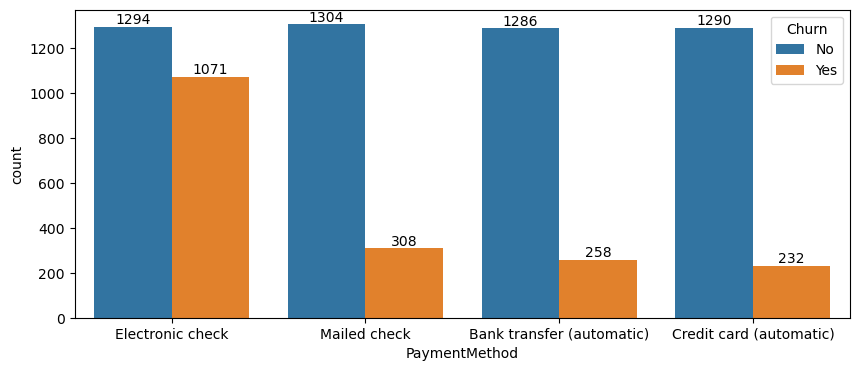

In [477]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=final_df,x='PaymentMethod',hue='Churn')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

In [478]:
# electronic check payment mode is favored by most customers and alomost same for other three
# more churn in Electronic Check payment method while same in other.

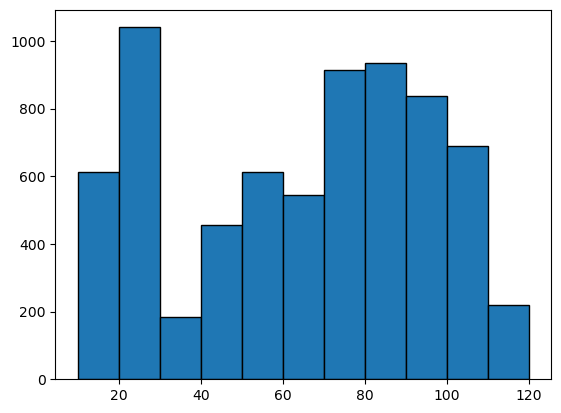

In [479]:
final_df['MonthlyCharges'].hist(edgecolor='black',bins=[10,20,30,40,50,60,70,80,90,100,110,120])
plt.grid(visible=None)

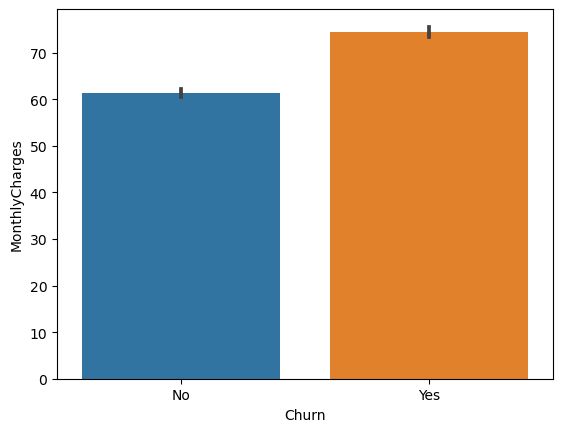

In [480]:
ax=sns.barplot(data=final_df, x='Churn',y='MonthlyCharges')

In [481]:
# according to monthly charge churing is high but is not that much dominating factor.

In [482]:
final_df['TotalCharges'].sample(10)

1211      740.8
3891    2386.85
1380     6145.2
2762     2513.5
375     3662.25
5798      474.8
1499     6081.4
533      7379.8
6289     7752.3
4763    5511.65
Name: TotalCharges, dtype: object

In [483]:
# is it numerical but given object so need to chage data type as float

In [484]:
final_df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ' '

In [485]:
final_df[final_df['TotalCharges']=='29.85']

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No


In [486]:
final_df.iloc[0]['TotalCharges']=29.85

In [487]:
final_df[final_df['TotalCharges']==' ']

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,,No,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,,No,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,,No,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,,No,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [488]:
final_df[final_df['TotalCharges'].isnull()]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [489]:
final_df['TotalCharges']=final_df['TotalCharges'].replace(" ",0)

In [490]:
final_df[final_df['TotalCharges']==' ']

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [491]:
final_df[final_df['TotalCharges'].isnull()]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [492]:
# so we replace " " string space with nan

In [493]:
# so we have 11 rows having missing value

<Axes: xlabel='TotalCharges', ylabel='Density'>

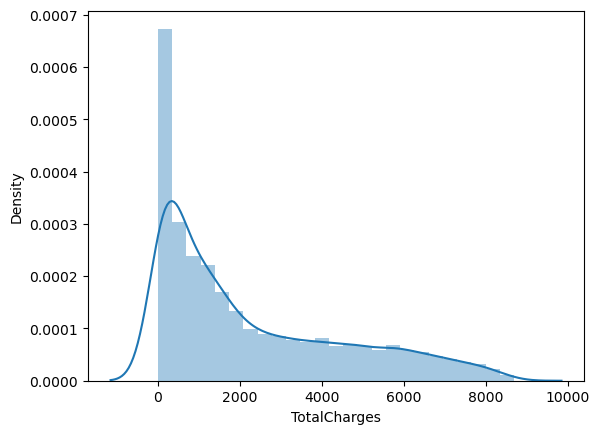

In [494]:
sns.distplot(final_df['TotalCharges'])

In [495]:
# so as it has +ve skewness

In [496]:
final_df['TotalCharges'].skew()

0.963234654832277

In [497]:
# as data is skewed so we replace it with median

In [498]:
med=final_df['TotalCharges'].median()
med

1394.55

In [499]:
final_df['TotalCharges'].mean()

TypeError: can only concatenate str (not "int") to str

In [500]:
final_df['TotalCharges']=final_df['TotalCharges'].replace(np.nan,med)

In [501]:
final_df['TotalCharges']=final_df['TotalCharges'].astype('float')

In [502]:
final_df['TotalCharges'].dtype

dtype('float64')

<Axes: xlabel='TotalCharges'>

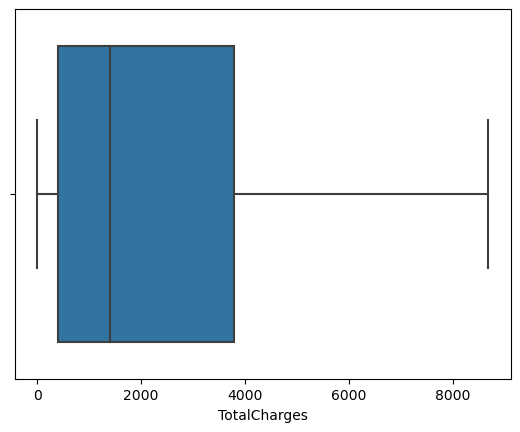

In [503]:
sns.boxplot(x=final_df['TotalCharges'])

In [504]:
# no outliers in total charges

<Axes: xlabel='Churn', ylabel='TotalCharges'>

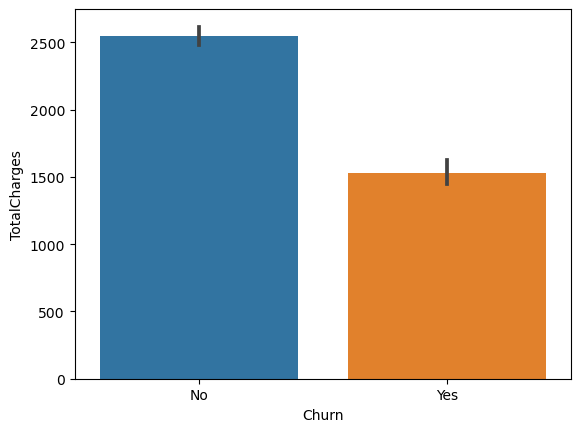

In [505]:
sns.barplot(data=final_df,x='Churn',y='TotalCharges')

In [506]:
# even if total charges are high still most choose no to churn and is almost half for those choosed yes

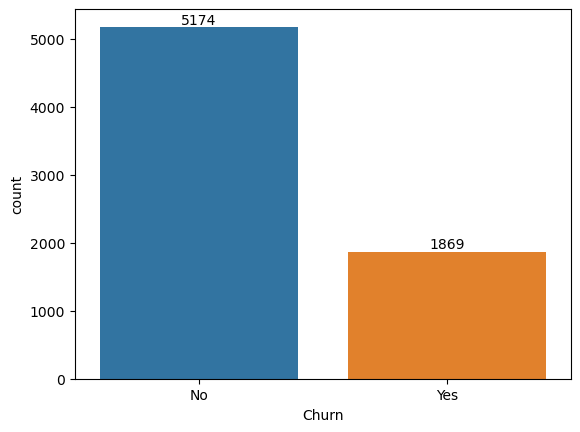

In [507]:
ax=sns.countplot(data=final_df, x='Churn')
for container in ax.containers:
    ax.bar_label(container)

In [508]:
len(final_df[final_df['Churn']=='Yes'])

1869

In [509]:
len(final_df[final_df['Churn']=='No'])

5174

In [510]:
len(final_df[final_df['Churn']=='No'])/len(final_df)

0.7346301292063041

In [511]:
# 73% customer have not chaged their telecom while rest of customer have change.

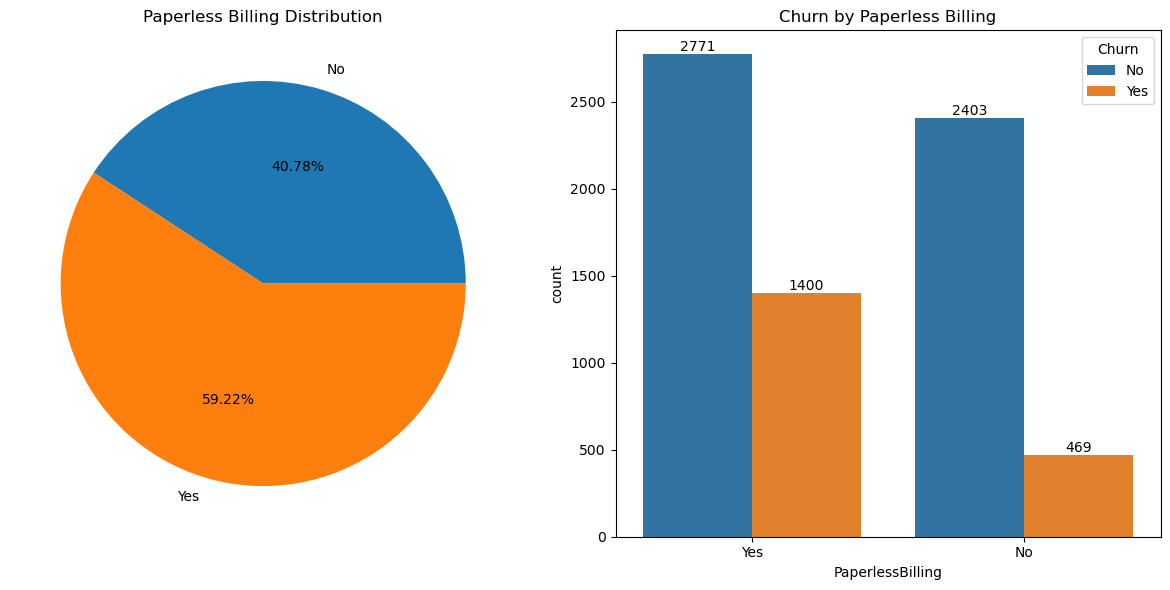

In [512]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

axs[0].pie(final_df.groupby('PaperlessBilling').size(), labels=['No', 'Yes'], autopct='%.2f%%')
axs[0].set_title('Paperless Billing Distribution')

ax2 = sns.countplot(data=final_df, x='PaperlessBilling', hue='Churn', ax=axs[1])
for container in ax2.containers:
    ax2.bar_label(container)
axs[1].set_title('Churn by Paperless Billing')

plt.tight_layout()

plt.show()

In [513]:
2771+1400

4171

In [514]:
1400/4171

0.33565092304003835

In [515]:
2403+469

2872

In [516]:
469/2403

0.1951727007906783

In [517]:
# so with paperless billing churing is almost same i.e about 20 and 30% with respect to customers in option
#  so such effect in final_df

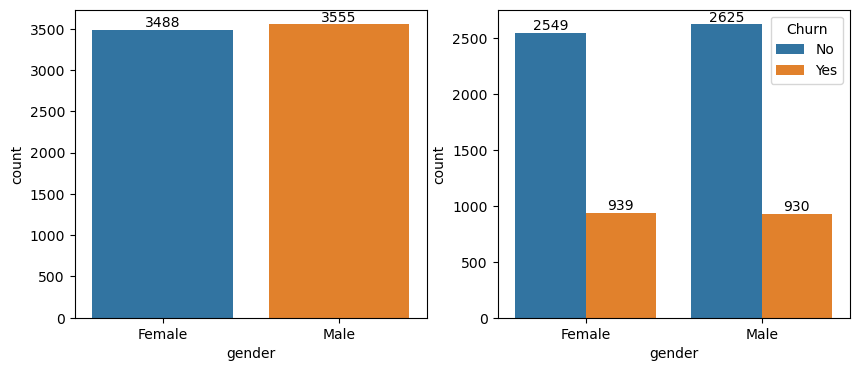

In [518]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax0=sns.countplot(data=final_df,x='gender',ax=ax[0])
for container in ax0.containers:
    ax0.bar_label(container)
    
ax1=sns.countplot(data=final_df,x='gender',hue='Churn',ax=ax[1])
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

In [519]:
# among customers male and female are almost equal and same percentage for churn

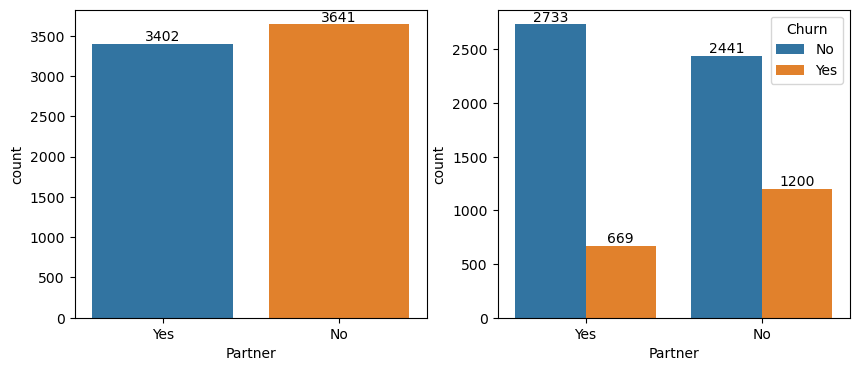

In [520]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax0=sns.countplot(data=final_df,x='Partner',ax=ax[0])
for container in ax0.containers:
    ax0.bar_label(container)
    
ax1=sns.countplot(data=final_df,x='Partner',hue='Churn',ax=ax[1])
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

In [521]:
# half of customer have partner and half dont and churning is almost same

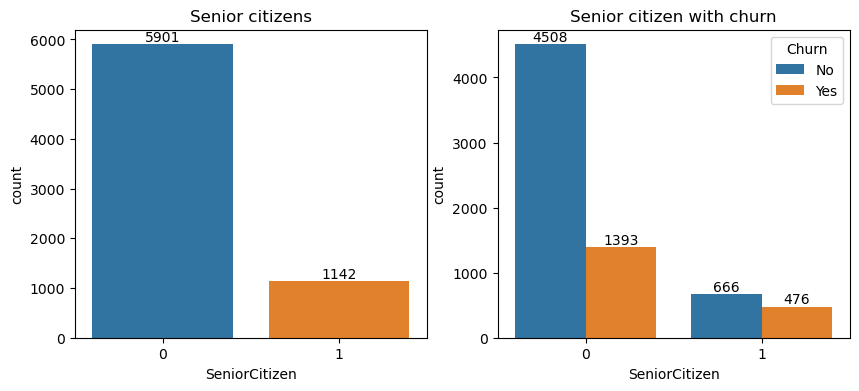

In [522]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax1=sns.countplot(data=final_df,x="SeniorCitizen",ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title("Senior citizens")

ax2=sns.countplot(data=final_df,x="SeniorCitizen",hue='Churn',ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title("Senior citizen with churn")
    
plt.show()

In [523]:
# there very few people are senior citizen -16%
len(final_df[final_df['SeniorCitizen']==1])/len(final_df)

0.1621468124378816

In [524]:
666+476

1142

In [525]:
476/1142 *100

41.68126094570928

In [526]:
# among the 16% senior citizen churn percentage is high about 41%

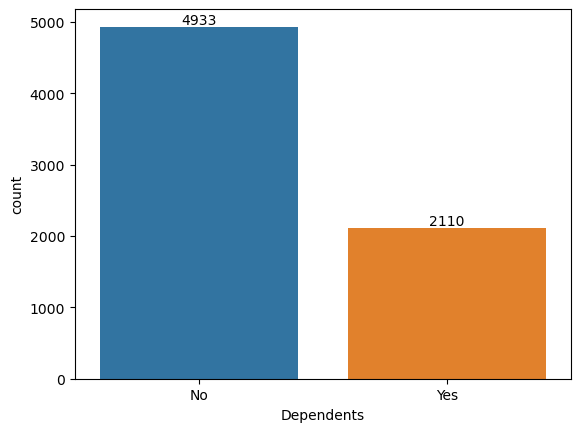

In [527]:
ax=sns.countplot(data=final_df, x='Dependents')
for container in ax.containers:
    ax.bar_label(container)

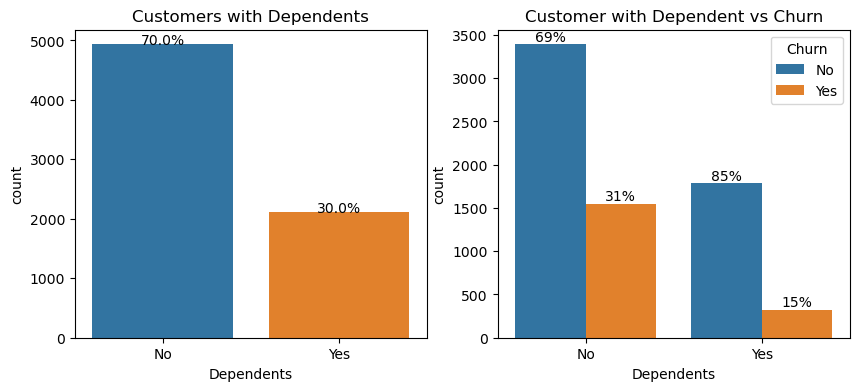

In [528]:
fig,ax= plt.subplots(1,2,figsize=(10,4))

ax1=sns.countplot(data=final_df,x='Dependents',ax=ax[0])
ax1.set_title('Customers with Dependents')
total = len(final_df['Dependents'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()+ p.get_width()-0.4
    y = p.get_height()
    ax1.annotate(percentage, (x,y),ha='center')

ax2=sns.countplot(data=final_df,x='Dependents',hue='Churn',ax=ax[1])
ax2.set_title("Customer with Dependent vs Churn")

bars = ax2.patches

half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax2.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax2.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


plt.show()

In [529]:
#most of customer(70%) don't have depents while 30% have and while among those 70%  almost 31 % are churned
# while churn percentage is very less in those who have dependents(15%)

# so conclusion if customer having depentent is less likely to churn

In [530]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [531]:
# phones service tells weather customer has landline along with internet connection

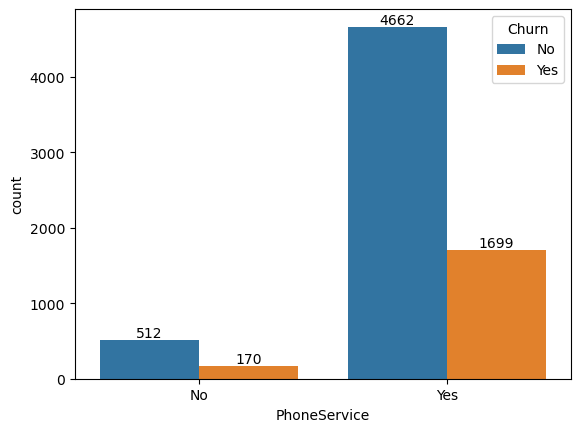

In [532]:

ax=sns.countplot(data=final_df,x='PhoneService',hue='Churn')
for container in ax.containers:
    ax.bar_label(container)

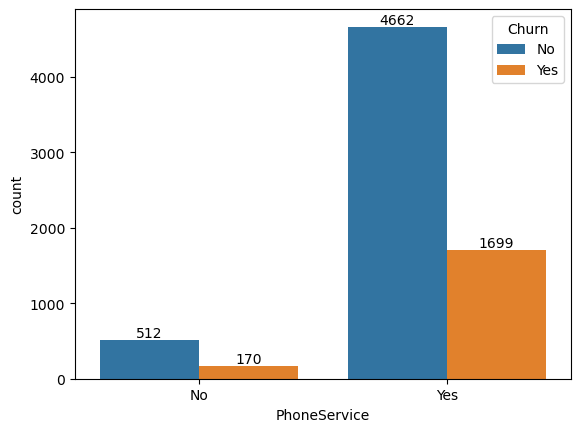

In [533]:
ax=sns.countplot(data=final_df,x='PhoneService',hue='Churn')
for container in ax.containers:
    ax.bar_label(container)

In [534]:
# so majoriy of customer are using landline with internet

In [535]:
final_df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

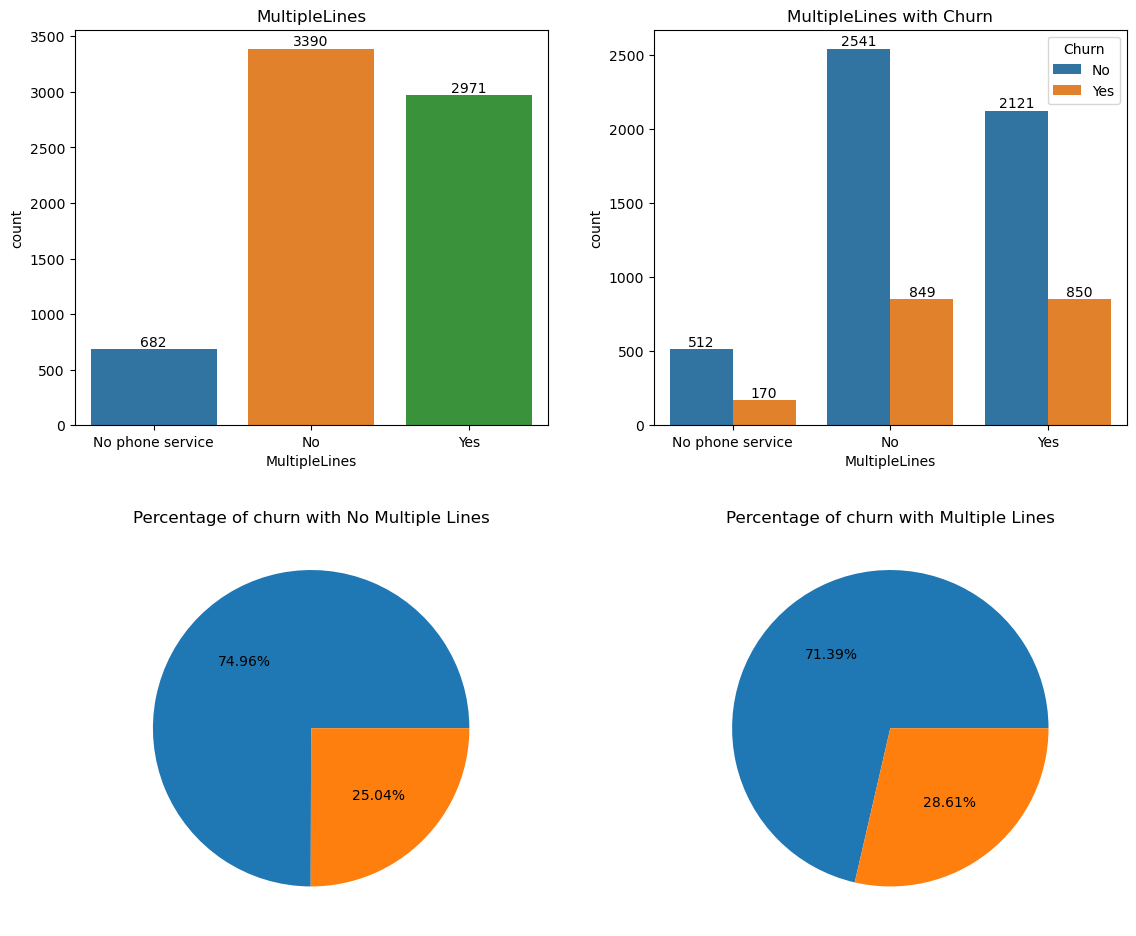

In [536]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('MultipleLines')
ax=sns.countplot(data=final_df,x='MultipleLines')
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(2,2,2)
ax=sns.countplot(data=final_df,x='MultipleLines',hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title('MultipleLines with Churn')

plt.subplot(2,2,3)
plt.pie(final_df.groupby(['MultipleLines','Churn']).size().reset_index().iloc[0:2][0],autopct="%0.2f%%")
plt.title('Percentage of churn with No Multiple Lines')

plt.subplot(2,2,4)
plt.pie(final_df.groupby(['MultipleLines','Churn']).size().reset_index().iloc[4:][0],autopct="%0.2f%%")
plt.title('Percentage of churn with Multiple Lines')

plt.tight_layout(pad=3)
plt.show()



In [537]:
# so there customers with internet but not with multiple lines-3390 are are in mojority followed by who have multiple lines(2971)
# churning is almost same for both single or mutple line so this has no big effect on churning

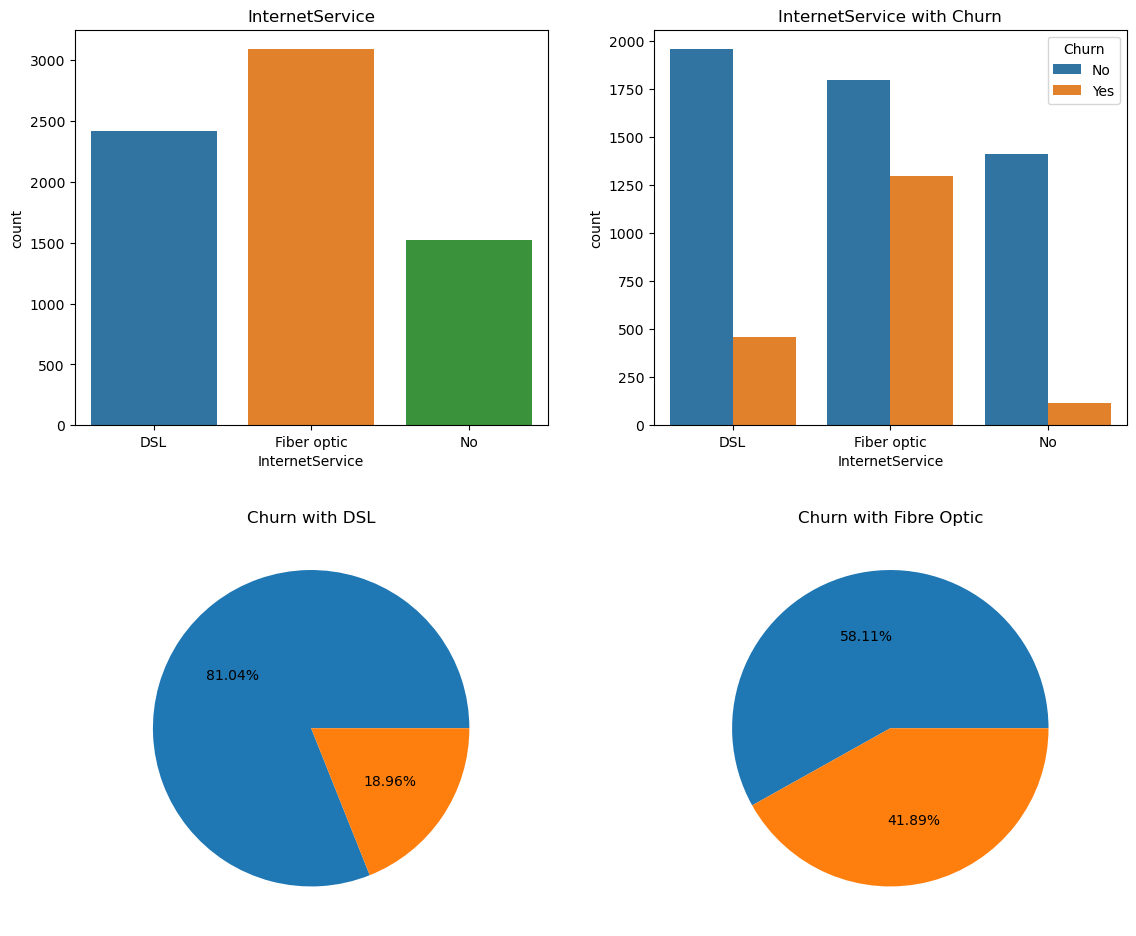

In [538]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('InternetService')
sns.countplot(data=final_df,x='InternetService')
plt.subplot(2,2,2)
plt.title('InternetService with Churn')
sns.countplot(data=final_df,x='InternetService',hue="Churn")

plt.subplot(2,2,3)
plt.pie(final_df.groupby(['InternetService','Churn']).size().reset_index().iloc[0:2][0],autopct='%.2f%%')
plt.title('Churn with DSL')

plt.subplot(2,2,4)
plt.pie(final_df.groupby(['InternetService','Churn']).size().reset_index().iloc[2:4][0],autopct='%.2f%%')
plt.title('Churn with Fibre Optic')

plt.tight_layout(pad=3)

plt.show()

In [539]:
# most of customer has fibre optic internet service but churning is also more in them  as compare to DSL

In [540]:
# so churnig in most common with fibre optic connection about 41% while it less in DSL connection about 19%
# so type of interconnection is import parameter for churning

In [541]:
final_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [542]:
# most cutomers have fiber optic connection wi

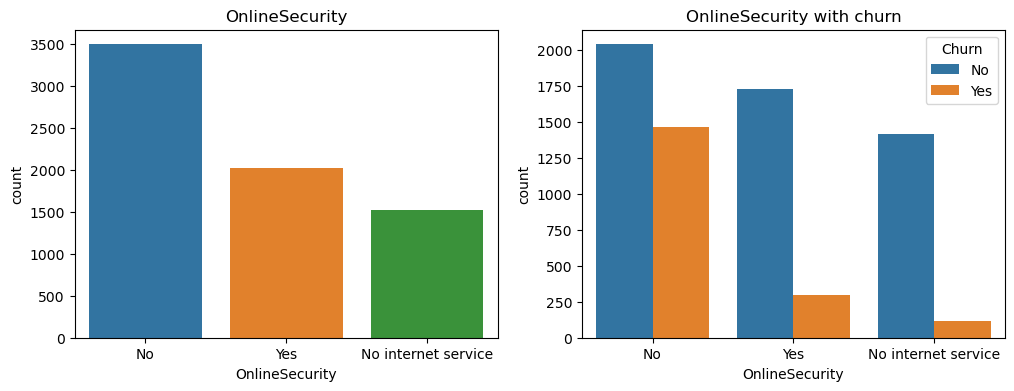

In [543]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('OnlineSecurity')
sns.countplot(data=final_df,x='OnlineSecurity')
plt.subplot(1,2,2)
plt.title('OnlineSecurity with churn')
sns.countplot(data=final_df,x='OnlineSecurity',hue="Churn")
plt.show()

In [544]:
# clearly it can be observed those customer opted for online security are less but churning is also less as compare to those choosed to no

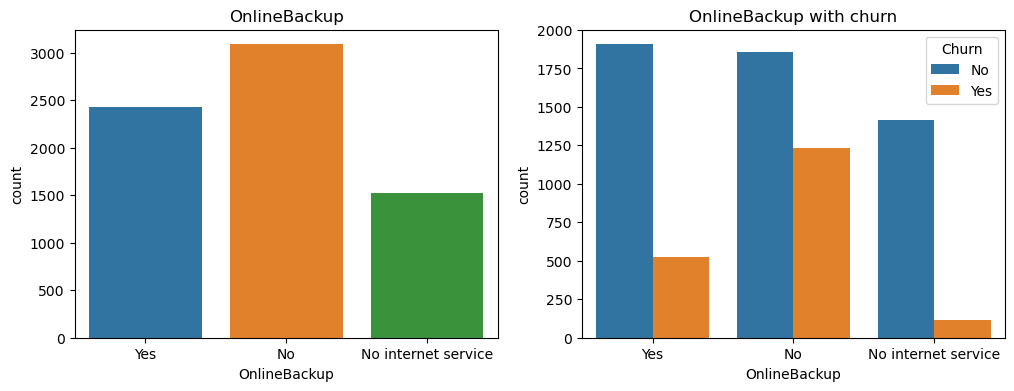

In [545]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('OnlineBackup')
sns.countplot(data=final_df,x='OnlineBackup')
plt.subplot(1,2,2)
plt.title('OnlineBackup with churn')
sns.countplot(data=final_df,x='OnlineBackup',hue="Churn")
plt.show()

In [546]:
# those customers choose to no to online backup are more prone to churn than who choose yes to online backup service.

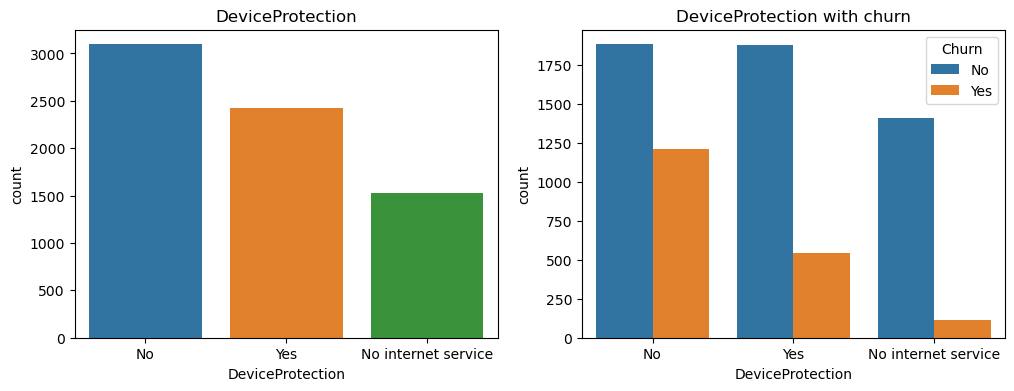

In [547]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('DeviceProtection')

sns.countplot(data=final_df,x='DeviceProtection')
plt.subplot(1,2,2)
plt.title('DeviceProtection with churn')

sns.countplot(data=final_df,x='DeviceProtection',hue="Churn")
plt.show()

In [548]:
# here in device protection also churning common in those opted to no than those opted for yes

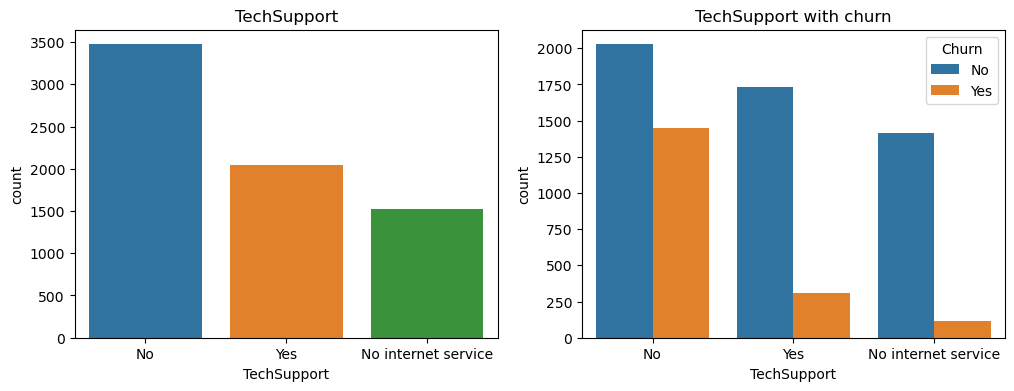

In [549]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('TechSupport')

sns.countplot(data=final_df,x='TechSupport')
plt.subplot(1,2,2)
plt.title('TechSupport with churn')

sns.countplot(data=final_df,x='TechSupport',hue="Churn")
plt.show()

In [550]:
# churning is high for those opted no to technical support than thos who opted yes

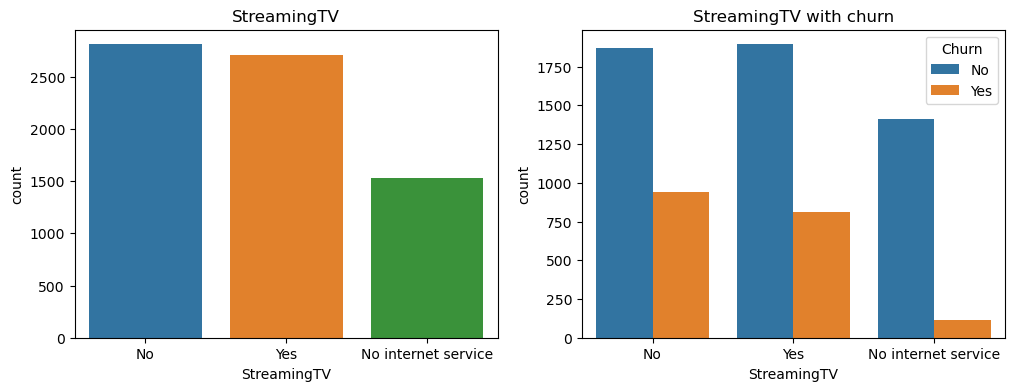

In [551]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('StreamingTV')

sns.countplot(data=final_df,x='StreamingTV')
plt.subplot(1,2,2)
plt.title('StreamingTV with churn')

sns.countplot(data=final_df,x='StreamingTV',hue="Churn")
plt.show()

In [552]:
# unlike other services here peoples opted for streaming tv is equally disstrbuted almost and even churing is almost same
# so streamtv has not much effect in churning

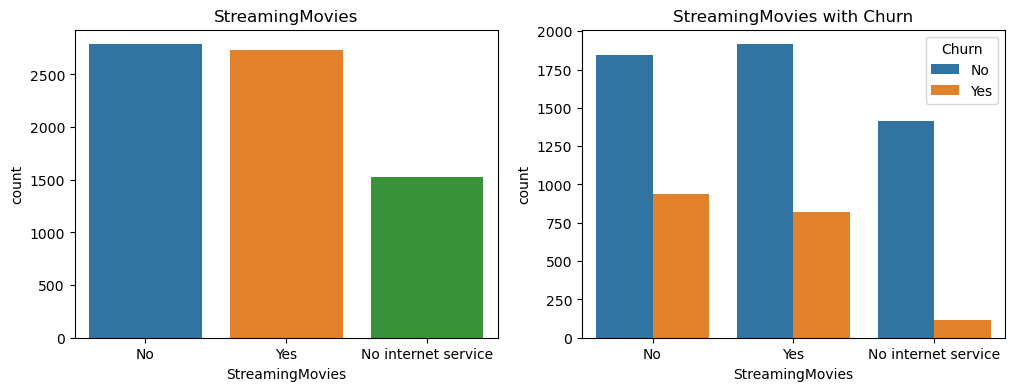

In [553]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('StreamingMovies')
sns.countplot(data=final_df,x='StreamingMovies')
plt.subplot(1,2,2)
plt.title('StreamingMovies with Churn')
sns.countplot(data=final_df,x='StreamingMovies',hue="Churn")
plt.show()

In [554]:
# unlike other services here peoples opted for streaming movies is equally distributed almost and even churing is almost same
# so stream movies also has not much effect in churning

In [555]:
# so from above all analysis paperless billing, monthly charges, gender, multiple lines, stream tv and stream movies are
# not  that much effect on churn so we remove those columns

In [556]:
final_df1=final_df.copy()

In [557]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [558]:
final_df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [559]:
final_df1.drop(columns=['customerID','PaperlessBilling','MonthlyCharges','gender','Partner','MultipleLines','StreamingTV','StreamingMovies'],axis=1,inplace=True)

In [560]:
final_df1

,tenure,PhoneService,Contract,PaymentMethod,TotalCharges,Churn,SeniorCitizen,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,1,No,Month-to-month,Electronic check,29.85,No,0,No,DSL,No,Yes,No,No
1,34,Yes,One year,Mailed check,1889.50,No,0,No,DSL,Yes,No,Yes,No
2,2,Yes,Month-to-month,Mailed check,108.15,Yes,0,No,DSL,Yes,Yes,No,No
3,45,No,One year,Bank transfer (automatic),1840.75,No,0,No,DSL,Yes,No,Yes,Yes
4,2,Yes,Month-to-month,Electronic check,151.65,Yes,0,No,Fiber optic,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,Mailed check,1990.50,No,0,Yes,DSL,Yes,No,Yes,Yes
7039,72,Yes,One year,Credit card (automatic),7362.90,No,0,Yes,Fiber optic,No,Yes,Yes,No
7040,11,No,Month-to-month,Electronic check,346.45,No,0,Yes,DSL,Yes,No,No,No
7041,4,Yes,Month-to-month,Mailed check,306.60,Yes,1,No,Fiber optic,No,No,No,No


In [561]:
from sklearn.preprocessing import LabelEncoder

In [562]:
le=LabelEncoder()

In [563]:
cat=['PhoneService','Contract','PaymentMethod','Dependents','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport']

In [564]:
# here phone service,payment_method,dependent,internet_service,online security,OnlineBackup,DeviceProtection,TechSupport are
# nominal and hence we use one-hot encoding 

In [565]:
# while Contract is ordinal we use label encoding for it

In [566]:
nominal_cat=['PhoneService','PaymentMethod','Dependents','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport']

In [567]:
final_df2=pd.get_dummies(final_df1,columns=nominal_cat,drop_first=True,dtype='int')

In [568]:
final_df2

,tenure,Contract,TotalCharges,Churn,SeniorCitizen,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1,Month-to-month,29.85,No,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,34,One year,1889.50,No,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2,Month-to-month,108.15,Yes,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,45,One year,1840.75,No,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,Month-to-month,151.65,Yes,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,One year,1990.50,No,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
7039,72,One year,7362.90,No,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0
7040,11,Month-to-month,346.45,No,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
7041,4,Month-to-month,306.60,Yes,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [569]:
from sklearn.preprocessing import LabelEncoder

In [570]:
le=LabelEncoder()

In [571]:
le.fit(final_df2['Contract'])

LabelEncoder()

In [572]:
final_df2['Contract']=le.transform(final_df2['Contract'])

In [573]:
final_df2

,tenure,Contract,TotalCharges,Churn,SeniorCitizen,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1,0,29.85,No,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,34,1,1889.50,No,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2,0,108.15,Yes,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,45,1,1840.75,No,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,0,151.65,Yes,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1990.50,No,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
7039,72,1,7362.90,No,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0
7040,11,0,346.45,No,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
7041,4,0,306.60,Yes,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [574]:
# churn is our dependent variable and we can do label encoding on it

In [575]:
le.fit_transform(final_df2['Churn'])

array([0, 0, 1, ..., 0, 1, 0])

In [576]:
final_df2['Churn']=le.fit_transform(final_df2['Churn'])

In [577]:
final_df2

,tenure,Contract,TotalCharges,Churn,SeniorCitizen,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1,0,29.85,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,34,1,1889.50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2,0,108.15,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,45,1,1840.75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,0,151.65,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1990.50,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
7039,72,1,7362.90,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0
7040,11,0,346.45,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
7041,4,0,306.60,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [578]:
# now seprate depent and independent variable

In [579]:
x=final_df2.drop('Churn',axis=1)

In [580]:
x

,tenure,Contract,TotalCharges,SeniorCitizen,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1,0,29.85,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,34,1,1889.50,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2,0,108.15,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,45,1,1840.75,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,0,151.65,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1990.50,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
7039,72,1,7362.90,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0
7040,11,0,346.45,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
7041,4,0,306.60,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [581]:
y=final_df2['Churn']

In [582]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [583]:
from sklearn.model_selection import train_test_split

In [584]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [585]:
len(x_train)

5634

In [586]:
len(x_test)

1409

In [587]:
from sklearn.linear_model import LogisticRegression

In [588]:
lr=LogisticRegression()

In [589]:
lr.fit(x_train,y_train)

LogisticRegression()

In [594]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [591]:
lr.score(x_test,y_test)

0.8161816891412349

In [592]:
from sklearn.metrics import confusion_matrix

In [595]:
confusion_matrix(y_pred,y_test)

array([[934, 157],
       [102, 216]], dtype=int64)